https://www.kaggle.com/nadintamer/top-tracks-of-2017/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('spotify_2017_top_tracks.csv')

data.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


Let's first understand what each of the audio features mean

- "Danceability" describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- "Energy" is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- "key" is the track the music is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

- "loudness" is the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

- "Mode" indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- "Speechiness" detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- "Acousticness" is a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- "instrumentalness" predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- "liveness" detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- "valence" is a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- "Tempo" is the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- "duration_ms" is the duration of the track in milliseconds.

- "time_signature" is an estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

In [3]:
# Checking if there's any missing data or incorrect data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null float64
loudness            100 non-null float64
mode                100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null float64
time_signature      100 non-null float64
dtypes: float64(13), object(3)
memory usage: 12.6+ KB


### Which Artists are on the list of top tracks?

In [4]:
# List of artists and the number of songs that became popular in 2017 for each artist
pd.DataFrame(data['artists'].value_counts().values, index=data['artists'].value_counts().index, columns=['Counts'])

,Counts
Ed Sheeran,4
The Chainsmokers,4
Drake,3
Martin Garrix,3
Post Malone,2
DJ Khaled,2
Khalid,2
ZAYN,2
Imagine Dragons,2
Calvin Harris,2


The chainsmokers, Ed Sheeran, Drake and Martin Garrix are the top 4 artists who had the most hit songs for 2017

In [5]:
# Merging the counts info into the original data

data = data.drop('id', axis=1).set_index('artists').\
join(pd.DataFrame(data['artists'].value_counts().values, index=data['artists'].value_counts().index, columns=['Counts'])).reset_index()

In [6]:
data.columns

Index(['index', 'name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'Counts'],
      dtype='object')

In [7]:
# change "index" column name into "artists"
data.columns = ['artists', 'name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'Counts']

In [8]:
data.head()

,artists,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Counts
0,21 Savage,Bank Account,0.884,0.346,8.0,-8.228,0.0,0.3510,0.0151,0.000007,0.0871,0.376,75.016,220307.0,4.0,1
1,AJR,Weak,0.673,0.637,5.0,-4.518,1.0,0.0429,0.1370,0.000000,0.1840,0.678,123.980,201160.0,4.0,1
2,Alessia Cara,"How Far I'll Go - From ""Moana""",0.314,0.555,9.0,-9.601,1.0,0.3700,0.1570,0.000108,0.0670,0.159,179.666,175517.0,4.0,1
3,Alok,Hear Me Now,0.789,0.442,11.0,-7.844,1.0,0.0421,0.5860,0.003660,0.0927,0.450,121.971,192846.0,4.0,1
4,Ariana Grande,Side To Side,0.648,0.738,6.0,-5.883,0.0,0.2470,0.0408,0.000000,0.2920,0.603,159.145,226160.0,4.0,1


### Danceability?

Mean danceability is:  0.69682


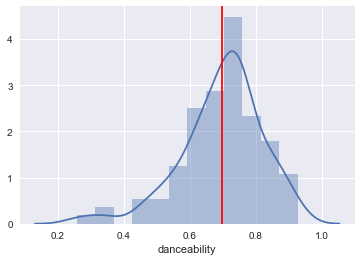

In [9]:
# Distribution of danceability of top tracks
sns.distplot(data['danceability'])

# Average danceability of top tracks
plt.axvline(x=data['danceability'].mean(), color='red')
print("Mean danceability is: ", data['danceability'].mean())

In [10]:
# We can see that there 57 entries whose danceability is higher than the average danceability
data[data['danceability'] > data['danceability'].mean()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 99
Data columns (total 16 columns):
artists             57 non-null object
name                57 non-null object
danceability        57 non-null float64
energy              57 non-null float64
key                 57 non-null float64
loudness            57 non-null float64
mode                57 non-null float64
speechiness         57 non-null float64
acousticness        57 non-null float64
instrumentalness    57 non-null float64
liveness            57 non-null float64
valence             57 non-null float64
tempo               57 non-null float64
duration_ms         57 non-null float64
time_signature      57 non-null float64
Counts              57 non-null int64
dtypes: float64(13), int64(1), object(2)
memory usage: 7.6+ KB


The distribution is slight skewed to the left. There are 57 songs out of 100 that had higher danceability than the average. There were a bit more danceable songs among the tracks that went popular in 2017

### Keys?

In [11]:
# Mapping key numbers to actual notes
key_note_map =\
{0.0: 'C', 1.0: 'C♯,D♭', 2.0: 'D', 3.0: 'D♯,E♭', 4.0: 'E', 5.0: 'F', 6.0: 'F♯,G♭', 
 7.0: 'G', 8.0: 'G♯,A♭', 9.0: 'A', 10.0: 'A♯,B♭', 11.0: 'B'}

data['key'] = data['key'].map(key_note_map)

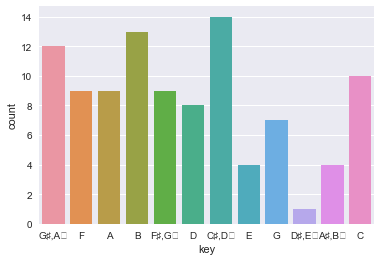

In [12]:
# Counts of tracks for each key
sns.countplot(data['key'])

C♯,D♭/ B / G♯,A♭ are the most widely used keys for the top tracks of 2017. E/ D♯,E♭/A♯,B♭were the least used.

### Acousticness?

Mean Acousticness is:  0.16630648999999997


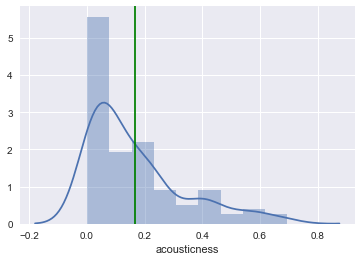

In [13]:
# Distribution of Acousticness of top tracks
sns.distplot(data['acousticness'])

# Average Acousticness of top tracks
plt.axvline(x=data['acousticness'].mean(), color='green')
print("Mean Acousticness is: ", data['acousticness'].mean())

Mean acoustincness was 0.166 out of a scale of 0 to 1.0. Average Spotify top tracks in 2017 were far from being acoustic. The distribution above is also extremely skewed to the right.

Mean Liveness is:  0.150607


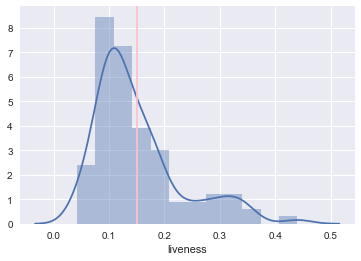

In [14]:
# Distribution of liveness of top tracks
sns.distplot(data['liveness'])

# Average liveness of top tracks
plt.axvline(x=data['liveness'].mean(), color='pink')
print("Mean Liveness is: ", data['liveness'].mean())

Liveness feature is pretty much similar to acoustiness. Mean liveness was 0.15. The result is not surprising because artists rarely record songs live (with audiences in front of them) unless the tracks are meant to be a live version.

### Correlation among variables?

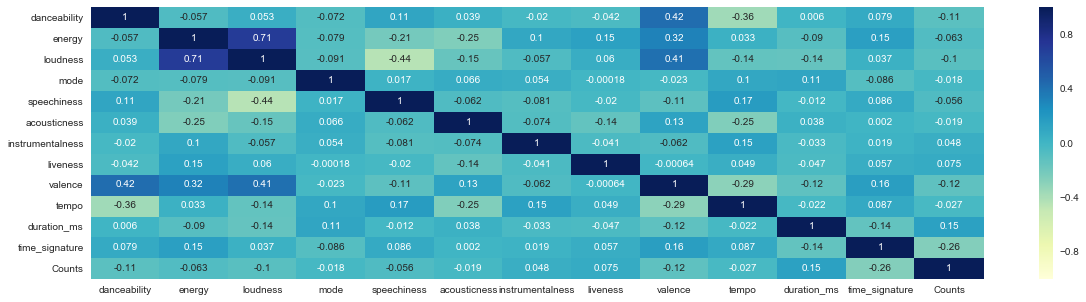

In [17]:
plt.figure(figsize = (20,5))

with sns.axes_style("white"):
    sns.heatmap(data.set_index(['artists', 'name']).corr(), cmap="YlGnBu", annot=True)

The following pairs have notably strong correlations:

- Danceability & Valence: This means the more positivity listeners can perceive from music, the more likely the music is going to be danceable
- Loudness & Energy: These two audio features are similar to each other. Energetic songs tend to have higher decibels.
- Loudness & Valence: Positive music tends to be louder...? 
- Valence & Energy: More energetic music tends to be perceived more positively to listeners